Library

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
from imblearn.over_sampling import ADASYN
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.neural_network._multilayer_perceptron import MLPClassifier
from catboost import CatBoostClassifier

# Read Data, EDA And Preprocessing

In [44]:
df = pd.read_csv("dataset.csv")
print(df.head())

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

In [45]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [46]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [47]:
df.duplicated().sum()

0

In [48]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None


In [49]:
df.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [50]:
df['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64

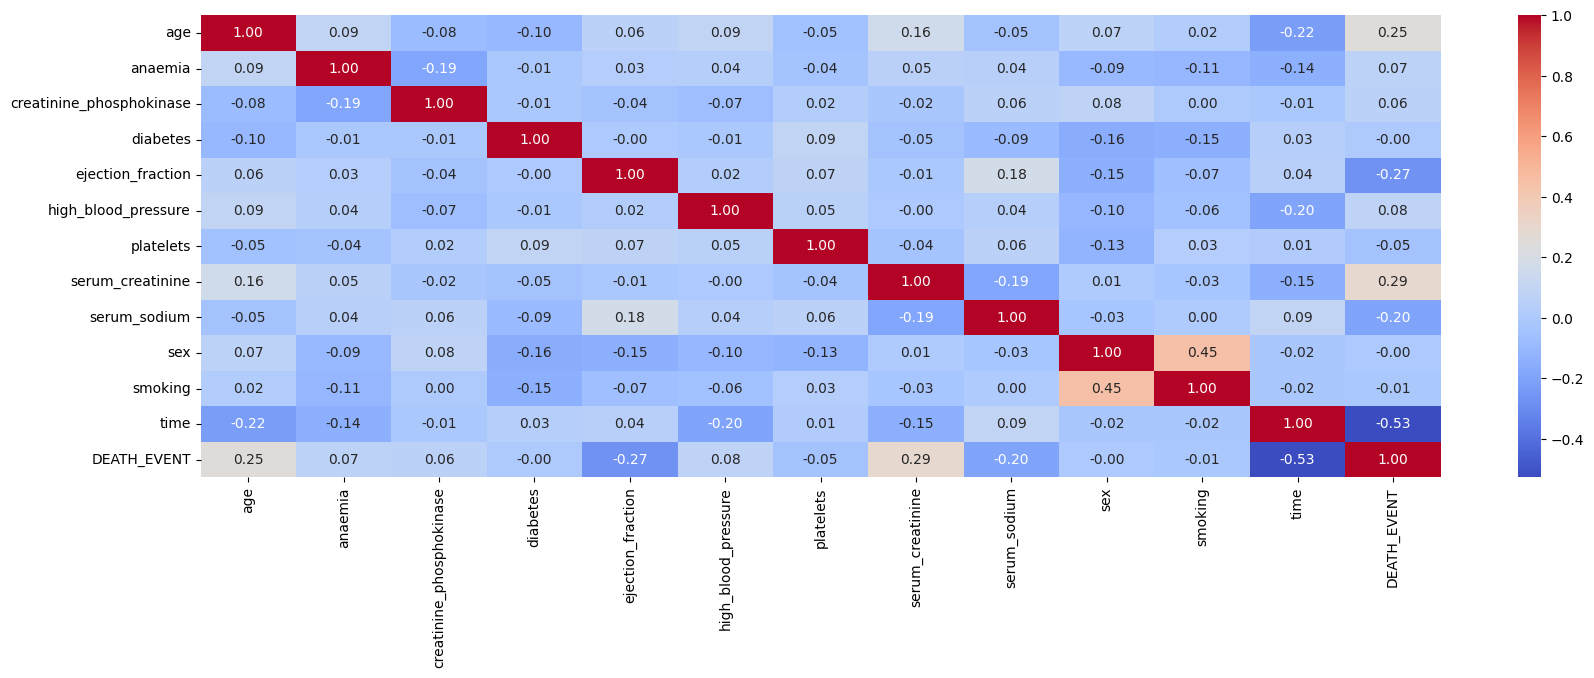

In [51]:
plt.figure(figsize=(20,6))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

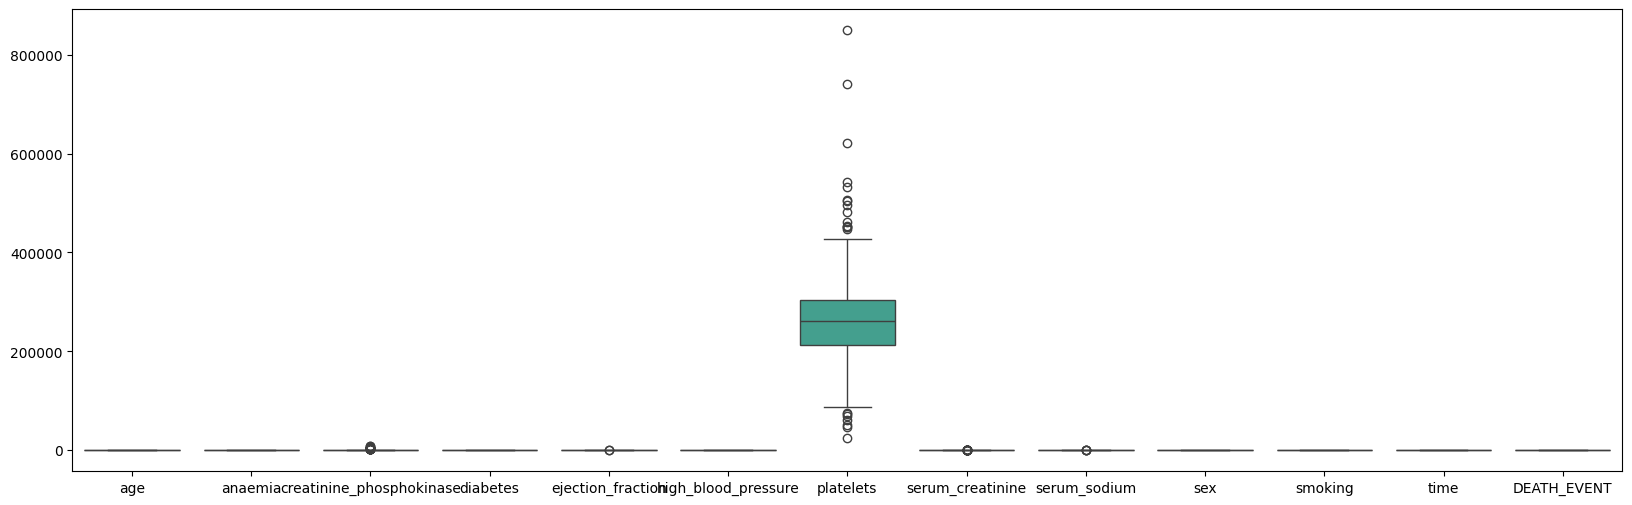

In [52]:
plt.figure(figsize = (20,6))
sns.boxplot(df)
plt.show()

In [53]:
outliers = []
def detect_outlier(data):
    threshold = 3
    mean = np.mean(data)
    std = np.std(data)
    
    for i in data:
        z_score = (i - mean)/std
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

platelets = np.array(df['platelets'])
check_oulier = detect_outlier(platelets)

In [54]:
print(platelets)

[265000.   263358.03 162000.   210000.   327000.   204000.   127000.
 454000.   263358.03 388000.   368000.   253000.   136000.   276000.
 427000.    47000.   262000.   166000.   237000.    87000.   276000.
 297000.   289000.   368000.   263358.03 149000.   196000.   284000.
 153000.   200000.   263358.03 360000.   319000.   302000.   188000.
 228000.   226000.   321000.   305000.   329000.   263358.03 153000.
 185000.   218000.   194000.   310000.   271000.   451000.   140000.
 395000.   166000.   418000.   263358.03 351000.   255000.   461000.
 223000.   216000.   319000.   254000.   390000.   216000.   254000.
 385000.   263358.03 119000.   213000.   274000.   244000.   497000.
 374000.   122000.   243000.   149000.   266000.   204000.   317000.
 237000.   283000.   324000.   293000.   263358.03 196000.   172000.
 302000.   406000.   173000.   304000.   235000.   181000.   249000.
 297000.   263358.03 210000.   327000.   219000.   254000.   255000.
 318000.   221000.   298000.   263

In [55]:
# Mencari lower bound dan upperbound data salary

Q1 = df["platelets"].quantile(0.25)
Q3 = df["platelets"].quantile(0.75)

IQR = Q3-Q1

upper_bound = Q3 + (1.5)*IQR
lower_bound = Q1 - (1.5)*IQR

print(Q1, 1.5*IQR)

print(lower_bound, upper_bound)

212500.0 136500.0
76000.0 440000.0


In [56]:
df = df.loc[~((df["platelets"]>upper_bound) | (df["platelets"]<lower_bound)), :]

#data_baru = data[:][~((data["salary"]>upper_bound) | (data["salary"]<lower_bound))]

df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [57]:
plt.figure(figsize=(20,6))
sns.boxplot(df)
plt.show()

KeyboardInterrupt: 

In [ ]:
y = df['DEATH_EVENT']

In [ ]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

<Axes: xlabel='anaemia', ylabel='DEATH_EVENT'>

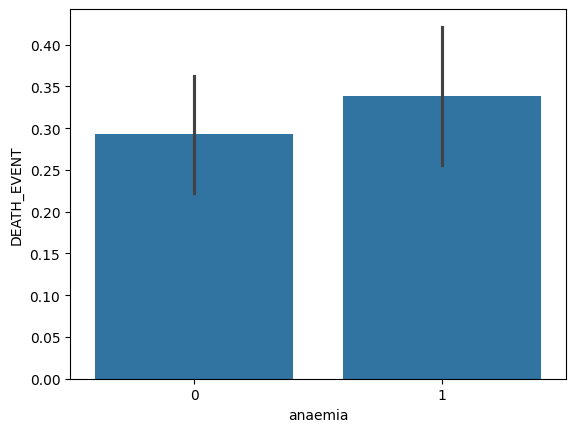

In [ ]:
sns.barplot(x=df['anaemia'],y=y)

<Axes: xlabel='age', ylabel='DEATH_EVENT'>

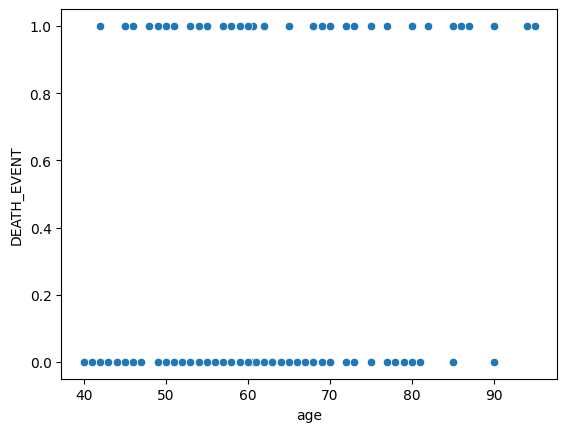

In [ ]:
sns.scatterplot(x=df['age'],y=y)

C:\Users\tyogo\AppData\Local\Temp\ipykernel_92056\2855061559.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['DEATH_EVENT'])


<Axes: xlabel='DEATH_EVENT', ylabel='Density'>

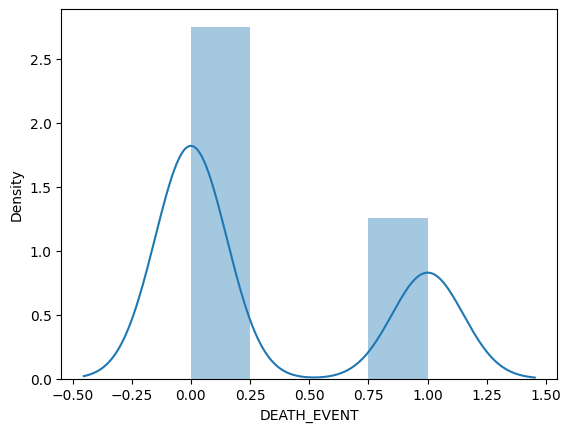

In [ ]:
sns.distplot(df['DEATH_EVENT'])

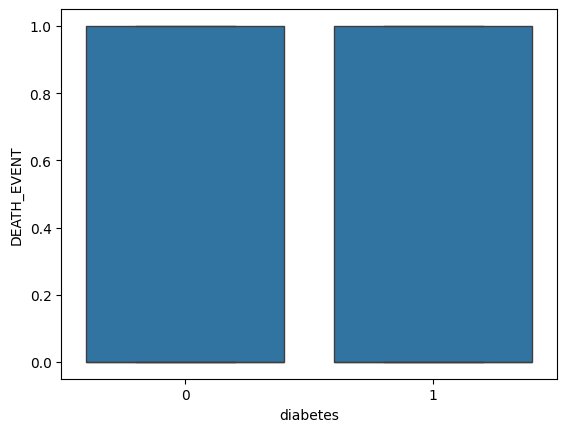

In [ ]:
sns.boxplot(x=df['diabetes'],y=y,data=df)
plt.show()

<Axes: xlabel='DEATH_EVENT', ylabel='count'>

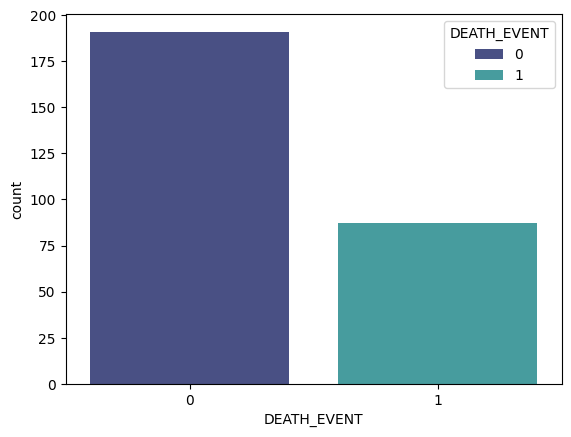

In [ ]:
sns.countplot(x=df['DEATH_EVENT'],data=df,hue="DEATH_EVENT",palette="mako")

<Axes: xlabel='ejection_fraction', ylabel='age'>

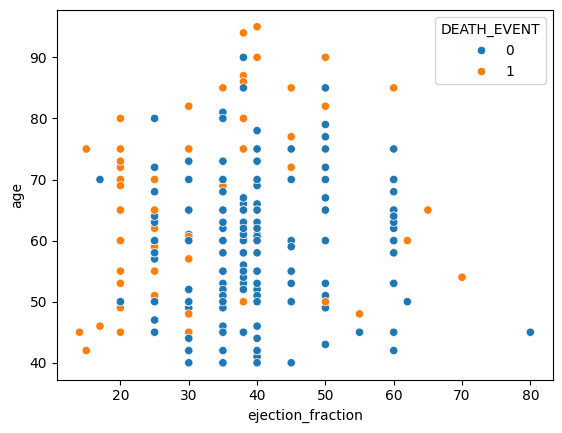

In [ ]:
sns.scatterplot(x=df['ejection_fraction'],y=df['age'],hue="DEATH_EVENT",data=df)

<Axes: xlabel='sex', ylabel='time'>

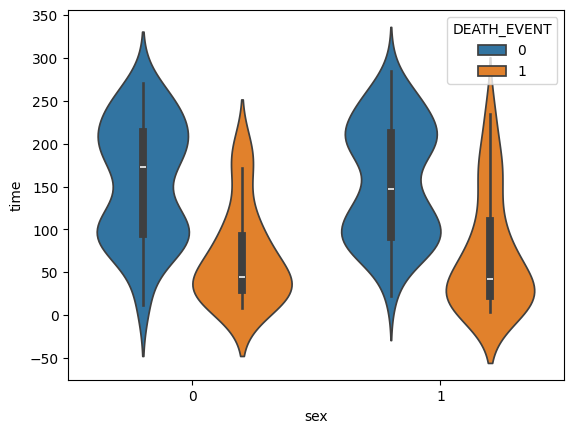

In [ ]:
sns.violinplot(y=df['time'],x=df['sex'],hue='DEATH_EVENT',data=df)

<Axes: xlabel='smoking', ylabel='age'>

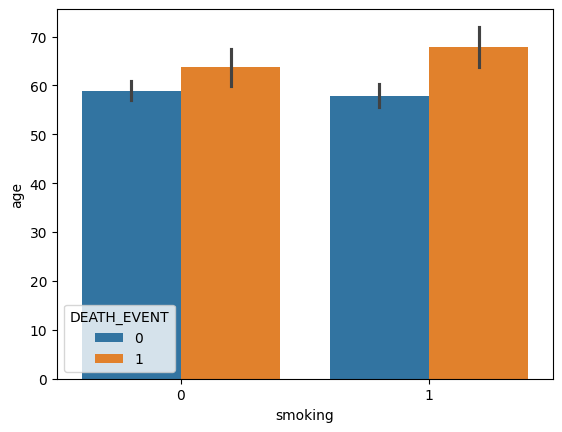

In [ ]:
sns.barplot(x=df['smoking'],y=df['age'],hue='DEATH_EVENT',data=df)

In [ ]:
df['DEATH_EVENT']

0      1
1      1
2      1
3      1
4      1
      ..
293    0
294    0
295    0
297    0
298    0
Name: DEATH_EVENT, Length: 278, dtype: int64

<Axes: xlabel='high_blood_pressure', ylabel='smoking'>

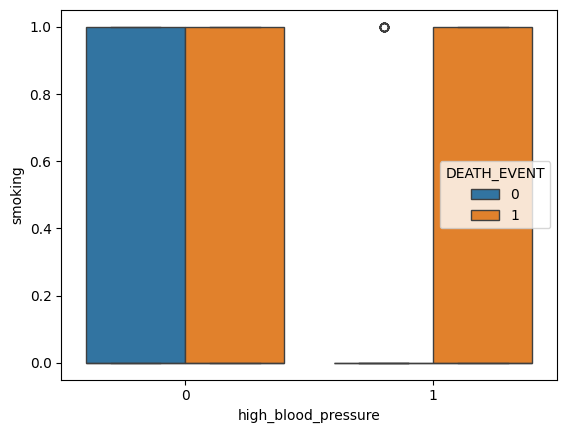

In [ ]:
sns.boxplot(x=df['high_blood_pressure'],y=df['smoking'],hue='DEATH_EVENT',data=df)

In [ ]:
df['smoking'].unique()

array([0, 1], dtype=int64)

In [ ]:
print(df.columns)

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


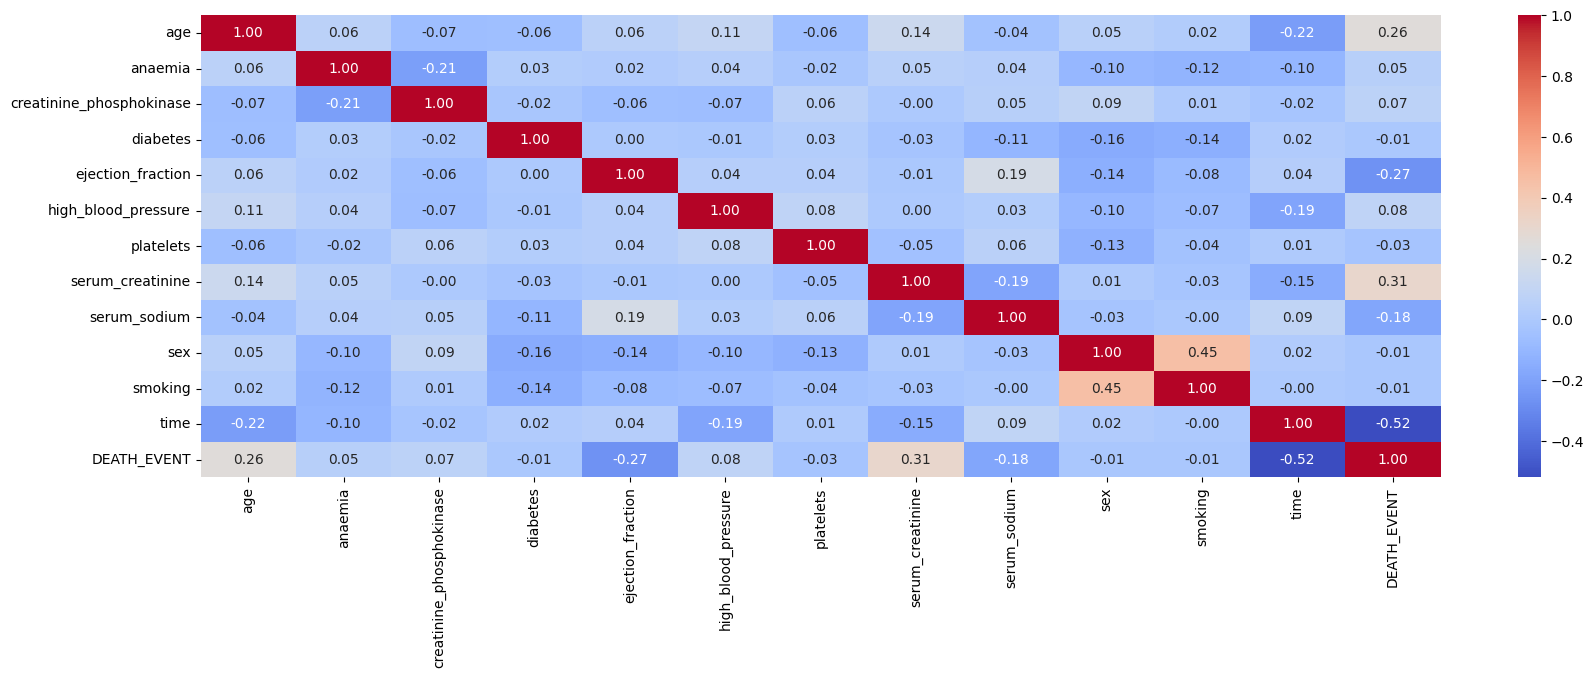

In [ ]:
plt.figure(figsize=(20,6))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [ ]:
df.corr()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.063633,-0.065388,-0.062015,0.062545,0.105009,-0.058909,0.141339,-0.040125,0.052015,0.021006,-0.218034,0.256207
anaemia,0.063633,1.000000,-0.211980,0.026833,0.016565,0.039205,-0.017200,0.053256,0.044037,-0.103215,-0.120329,-0.104771,0.049023
creatinine_phosphokinase,-0.065388,-0.211980,1.000000,-0.015442,-0.057895,-0.068058,0.064251,-0.002190,0.048308,0.092529,0.011543,-0.022461,0.070974
diabetes,-0.062015,0.026833,-0.015442,1.000000,0.000312,-0.006996,0.029641,-0.032393,-0.107902,-0.162440,-0.144047,0.018698,-0.005738
ejection_fraction,0.062545,0.016565,-0.057895,0.000312,1.000000,0.042261,0.039555,-0.006970,0.187966,-0.144158,-0.081530,0.038000,-0.266685
high_blood_pressure,0.105009,0.039205,-0.068058,-0.006996,0.042261,1.000000,0.084432,0.001456,0.027297,-0.100375,-0.074465,-0.192923,0.081753
platelets,-0.058909,-0.017200,0.064251,0.029641,0.039555,0.084432,1.000000,-0.046285,0.056421,-0.128942,-0.040259,0.010754,-0.032195
serum_creatinine,0.141339,0.053256,-0.002190,-0.032393,-0.006970,0.001456,-0.046285,1.000000,-0.188240,0.010309,-0.026213,-0.154227,0.306787
serum_sodium,-0.040125,0.044037,0.048308,-0.107902,0.187966,0.027297,0.056421,-0.188240,1.000000,-0.031356,-0.003983,0.090941,-0.182534
sex,0.052015,-0.103215,0.092529,-0.162440,-0.144158,-0.100375,-0.128942,0.010309,-0.031356,1.000000,0.453824,0.015427,-0.010480


In [ ]:
df['DEATH_EVENT'].value_counts()

DEATH_EVENT
0    191
1     87
Name: count, dtype: int64

In [ ]:
df = df.sample(frac=1).reset_index(drop=True)
# df = df.dropna()

In [ ]:
# Menghitung korelasi antara fitur-fitur dan kolom 'DEATH_EVENT'
corr_with_target = df.corrwith(df['DEATH_EVENT'])

# Menghapus korelasi yang nilainya kurang dari 0.1 atau lebih besar dari -0.1
filtered_corr_with_target = corr_with_target[(corr_with_target >= 0.1) | (corr_with_target <= -0.1)]

# Menampilkan korelasi yang telah difilter
print("Filtered Correlation with DEATH_EVENT:")
print(filtered_corr_with_target)


Filtered Correlation with DEATH_EVENT:
age                  0.256207
ejection_fraction   -0.266685
serum_creatinine     0.306787
serum_sodium        -0.182534
time                -0.519846
DEATH_EVENT          1.000000
dtype: float64


In [114]:
import matplotlib.pyplot as plt
importances = best_estimators["RandomForest"].named_steps["clf"].feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,5))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), filtered_corr_with_target.keys()[indices])
plt.xlim([-1, X.shape[1]])
plt.show()


Index(['age', 'ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [118]:
filtered_corr_without_target = filtered_corr_with_target[:-1]
filtered_corr_without_target


age                 -0.519846
ejection_fraction   -0.266685
serum_creatinine    -0.182534
serum_sodium         0.256207
time                 0.306787
dtype: float64

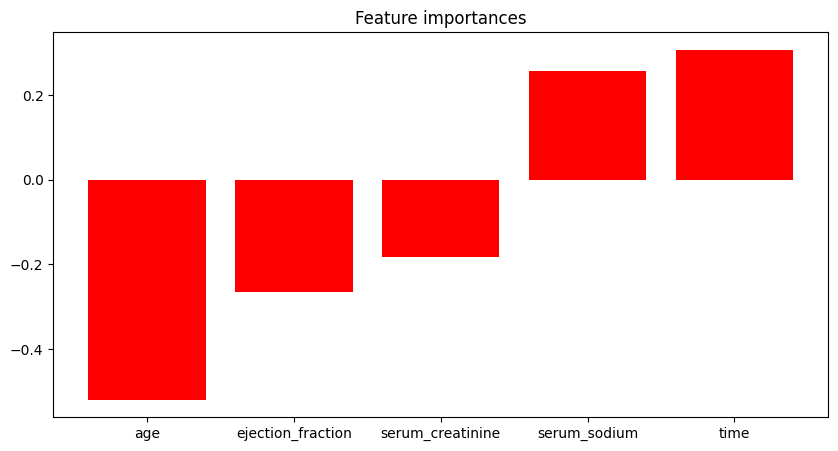

In [119]:
plt.figure(figsize=(10,5))
plt.bar(filtered_corr_without_target.keys(), filtered_corr_without_target.values, color="r", align="center")
plt.title("Feature importances")
plt.show()

In [ ]:
scaled_df_mod = df[filtered_corr_with_target.keys()]

In [ ]:
binary_columns = [col for col in scaled_df_mod.columns if set(df[col]) == {0, 1}]

# Memilih fitur-fitur yang bukan boolean
non_binary_columns = [col for col in scaled_df_mod.columns if col not in binary_columns]

# Penskalaan fitur-fitur yang bukan boolean
scaler = StandardScaler()
scaled_features = scaler.fit_transform(scaled_df_mod[non_binary_columns])

# Membuat DataFrame baru dengan fitur-fitur yang bukan boolean yang sudah discaling
scaled_df = pd.DataFrame(scaled_features, columns=non_binary_columns)

# Menggabungkan fitur-fitur yang bukan boolean yang sudah discaling dengan fitur-fitur boolean dan lainnya
scaled_df = pd.concat([scaled_df, scaled_df_mod[binary_columns]], axis=1)

# Menampilkan hasil penskalaan
print(scaled_df)


          age  ejection_fraction  serum_creatinine  serum_sodium      time  \
0   -0.474631           0.597601         -0.085675      0.079790 -0.532790   
1    0.121517           1.867732         -0.464637      0.527901 -0.155276   
2   -0.815286          -1.095907         -0.464637     -1.488600 -1.183675   
3    1.569303           1.020978          0.388027     -0.816433 -0.662967   
4    0.291844          -1.095907          0.956469     -0.368322  1.107442   
..        ...                ...               ...           ...       ...   
273 -0.048811           0.174224         -0.369896      0.976012  0.755964   
274  0.547336           0.004873         -0.180416     -0.816433  1.510991   
275  0.121517           0.004873         -0.275156      1.424124  1.836434   
276 -1.326269           0.004873         -0.559377      0.079790  1.510991   
277 -0.985614          -1.519284         -0.275156     -0.144266 -0.962374   

     DEATH_EVENT  
0              0  
1              0  
2     

In [ ]:
scaled_df

,age,ejection_fraction,serum_creatinine,serum_sodium,time,DEATH_EVENT
0,-0.474631,0.597601,-0.085675,0.079790,-0.532790,0
1,0.121517,1.867732,-0.464637,0.527901,-0.155276,0
2,-0.815286,-1.095907,-0.464637,-1.488600,-1.183675,1
3,1.569303,1.020978,0.388027,-0.816433,-0.662967,0
4,0.291844,-1.095907,0.956469,-0.368322,1.107442,0
...,...,...,...,...,...,...
273,-0.048811,0.174224,-0.369896,0.976012,0.755964,0
274,0.547336,0.004873,-0.180416,-0.816433,1.510991,0
275,0.121517,0.004873,-0.275156,1.424124,1.836434,0
276,-1.326269,0.004873,-0.559377,0.079790,1.510991,0


In [ ]:
y = y.dropna()
y.isnull().sort_values(ascending=False)


0      False
194    False
201    False
199    False
198    False
       ...  
103    False
104    False
106    False
107    False
298    False
Name: DEATH_EVENT, Length: 278, dtype: bool

In [ ]:


X = scaled_df.drop(["DEATH_EVENT"], axis=1)
y = scaled_df['DEATH_EVENT']

X_resample, y_resample = ADASYN(random_state=42).fit_resample(X, y)


In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample,test_size = 0.4, random_state=42)



# Train Model

In [79]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [77]:
base_models = {
    "RandomForest": RandomForestClassifier(n_estimators=300, random_state=42,max_depth=None,min_samples_leaf=1,min_samples_split=2),
    "CatBoostClassifier": CatBoostClassifier(),
    "Logistic": LogisticRegression(max_iter=1000, random_state=42,C=100,penalty='l1',solver='liblinear'),
    "KNeighbors": KNeighborsClassifier(n_neighbors=3,algorithm='auto',weights='distance'),
    "DecisionTree": DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_leaf=4,min_samples_split=10,splitter='random'),
    "MLRClassifier": MLPClassifier(activation='relu',alpha=0.0001,hidden_layer_sizes=300,max_iter=1000,random_state=42),
    "SVC": SVC(C=1,coef0=1,degree=5,gamma='scale',kernel='poly')
}

c:\Users\tyogo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForest Train Accuracy: 100.00% | Train f1-score : 100.00%
RandomForest Test Accuracy : 93.67% | Train f1-score : 93.15%


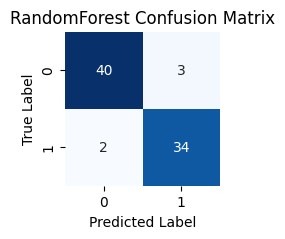

Learning rate set to 0.006291
0:	learn: 0.6883998	total: 2.94ms	remaining: 2.93s
1:	learn: 0.6845834	total: 4.84ms	remaining: 2.41s
2:	learn: 0.6800008	total: 6.4ms	remaining: 2.13s
3:	learn: 0.6751090	total: 8.01ms	remaining: 2s
4:	learn: 0.6697336	total: 9.52ms	remaining: 1.89s
5:	learn: 0.6653338	total: 11.4ms	remaining: 1.89s
6:	learn: 0.6609082	total: 13.6ms	remaining: 1.93s
7:	learn: 0.6564787	total: 15.3ms	remaining: 1.9s
8:	learn: 0.6512968	total: 17.6ms	remaining: 1.93s
9:	learn: 0.6465818	total: 19.4ms	remaining: 1.92s
10:	learn: 0.6420142	total: 21ms	remaining: 1.89s
11:	learn: 0.6369345	total: 22.7ms	remaining: 1.87s
12:	learn: 0.6332775	total: 24.5ms	remaining: 1.86s
13:	learn: 0.6290991	total: 26.5ms	remaining: 1.86s
14:	learn: 0.6249863	total: 28.8ms	remaining: 1.89s
15:	learn: 0.6209315	total: 30.8ms	remaining: 1.9s
16:	learn: 0.6173124	total: 32.6ms	remaining: 1.89s
17:	learn: 0.6134822	total: 34.4ms	remaining: 1.88s
18:	learn: 0.6095363	total: 36ms	remaining: 1.86s
19

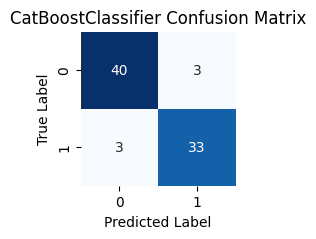

Logistic Train Accuracy: 75.87% | Train f1-score : 77.11%
Logistic Test Accuracy : 84.81% | Train f1-score : 83.78%


c:\Users\tyogo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


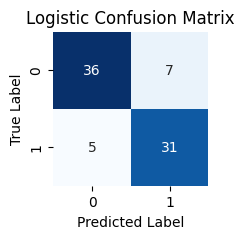

KNeighbors Train Accuracy: 100.00% | Train f1-score : 100.00%
KNeighbors Test Accuracy : 92.41% | Train f1-score : 92.31%


c:\Users\tyogo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


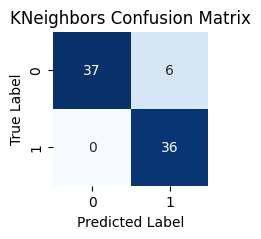

DecisionTree Train Accuracy: 86.35% | Train f1-score : 87.16%
DecisionTree Test Accuracy : 87.34% | Train f1-score : 86.11%


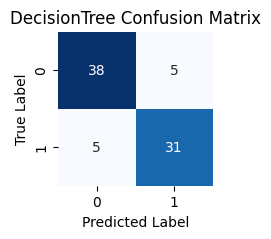

c:\Users\tyogo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLRClassifier Train Accuracy: 98.73% | Train f1-score : 98.80%
MLRClassifier Test Accuracy : 92.41% | Train f1-score : 92.11%


c:\Users\tyogo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


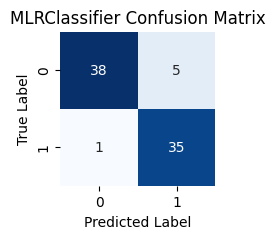

SVC Train Accuracy: 92.38% | Train f1-score : 93.14%
SVC Test Accuracy : 89.87% | Train f1-score : 89.19%


c:\Users\tyogo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


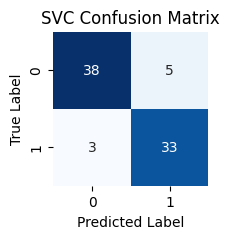

In [80]:
accuracies = {}

for name, model in base_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    accuracy_test = accuracy_score(y_test, y_pred)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracies[name] = accuracy_test
    print(f'{name} Train Accuracy: {accuracy_train * 100:.2f}% | Train f1-score : {f1_score(y_train, y_pred_train) * 100:.2f}%')
    print(f'{name} Test Accuracy : {accuracy_test * 100:.2f}% | Train f1-score : {f1_score(y_test, y_pred) * 100:.2f}%')
    cm = confusion_matrix(y_test, y_pred)
    file = open(f"{name}.pickle","wb")
    pickle.dump(model,file)
    file.close()
    # Plot confusion matrix
    plt.figure(figsize=(2, 2))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

In [85]:
param_grids = {
    "RandomForest": {
        'clf__n_estimators': [100, 200, 300],
        'clf__max_depth': [None, 10, 20, 30],
        'clf__min_samples_split': [2, 5, 10],
        'clf__min_samples_leaf': [1, 2, 4]
    },
    "Logistic": {
        'clf__penalty': ['l1', 'l2'],
        'clf__C': [0.1, 1, 10, 100],
        'clf__solver': ['liblinear', 'saga', 'lbfgs'],
        'clf__l1_ratio': [0.5] 
    },
    "KNeighbors": {
        'clf__n_neighbors': [3, 5, 7, 9],
        'clf__weights': ['uniform', 'distance'],
        'clf__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
    },
    "DecisionTree": {
        'clf__criterion': ['gini', 'entropy'],
        'clf__splitter': ['best', 'random'],
        'clf__max_depth': [None, 10, 20, 30],
        'clf__min_samples_split': [2, 5, 10],
        'clf__min_samples_leaf': [1, 2, 4]
    },
    "MLPClassifier": {
        'clf__hidden_layer_sizes': [(50,), (150,), (250,), (300,)],
        'clf__activation': ['logistic', 'tanh', 'relu'],
        'clf__alpha': [0.0001, 0.001, 0.01],
        'clf__max_iter': [100, 500 , 1000]
    },
    "SVC": {
        'clf__C': [0.1, 1, 10, 100],
        'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'clf__gamma': ['scale', 'auto'],
        'clf__degree': [3, 4, 5],
        'clf__coef0': [0.0, 0.1, 0.5, 1.0]
    }
}


In [83]:
classifiers = {
    "RandomForest": RandomForestClassifier(),
    "Logistic": LogisticRegression(max_iter=1000),
    "KNeighbors": KNeighborsClassifier(),
    "DecisionTree": DecisionTreeClassifier(),
    "MLPClassifier": MLPClassifier(),
    "SVC": SVC()
}

In [86]:
best_estimators = {}
best_scores = {}

for clf_name, clf in classifiers.items():
    pipeline = Pipeline([
        ('clf', clf)
    ])
    grid_search = GridSearchCV(pipeline, param_grids[clf_name], cv=5, n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    best_estimators[clf_name] = grid_search.best_estimator_
    best_scores[clf_name] = grid_search.best_score_
    print(f"Best parameters for {clf_name}: {grid_search.best_params_}")
    print(f"Best cross-validation score for {clf_name}: {grid_search.best_score_:.4f}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits


c:\Users\tyogo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Best parameters for RandomForest: {'clf__max_depth': 20, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 5, 'clf__n_estimators': 200}
Best cross-validation score for RandomForest: 0.8730
Fitting 5 folds for each of 24 candidates, totalling 120 fits


c:\Users\tyogo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
20 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\tyogo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\tyogo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\tyogo\AppDa

Best parameters for Logistic: {'clf__C': 0.1, 'clf__l1_ratio': 0.5, 'clf__penalty': 'l2', 'clf__solver': 'liblinear'}
Best cross-validation score for Logistic: 0.7397
Fitting 5 folds for each of 32 candidates, totalling 160 fits


c:\Users\tyogo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Best parameters for KNeighbors: {'clf__algorithm': 'auto', 'clf__n_neighbors': 7, 'clf__weights': 'distance'}
Best cross-validation score for KNeighbors: 0.8254
Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters for DecisionTree: {'clf__criterion': 'entropy', 'clf__max_depth': 30, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 10, 'clf__splitter': 'random'}
Best cross-validation score for DecisionTree: 0.8254
Fitting 5 folds for each of 108 candidates, totalling 540 fits


c:\Users\tyogo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1101: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\tyogo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Best parameters for MLPClassifier: {'clf__activation': 'relu', 'clf__alpha': 0.01, 'clf__hidden_layer_sizes': (250,), 'clf__max_iter': 1000}
Best cross-validation score for MLPClassifier: 0.8476
Fitting 5 folds for each of 384 candidates, totalling 1920 fits
Best parameters for SVC: {'clf__C': 1, 'clf__coef0': 0.5, 'clf__degree': 4, 'clf__gamma': 'scale', 'clf__kernel': 'poly'}
Best cross-validation score for SVC: 0.8381


c:\Users\tyogo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
# for clf_name, best_score in best_scores.items():
#     print(f"Best accuracy for {clf_name}: {best_score:.4f}")
#     print()

Best accuracy for RandomForest: 0.8921

Best accuracy for Logistic: 0.7810

Best accuracy for KNeighbors: 0.8571

Best accuracy for DecisionTree: 0.8413

Best accuracy for MLPClassifier: 0.8698

Best accuracy for SVC: 0.8540



In [ ]:


# for clf_name, best_estimator in best_estimators.items():
#     y_pred = best_estimator.predict(X_test)
#     test_accuracy = accuracy_score(y_test, y_pred)
#     r1 = f1_score(y_test,y_pred)
#     print(f"Test set accuracy for {clf_name}: {test_accuracy:.4f}")
#     print(f"Test set F1_Score for {clf_name}: {r1:.4f}")
#     print()


Test set accuracy for RandomForest: 0.9241
Test set F1_Score for RandomForest: 0.9318

Test set accuracy for Logistic: 0.8101
Test set F1_Score for Logistic: 0.8193

Test set accuracy for KNeighbors: 0.8987
Test set F1_Score for KNeighbors: 0.9130

Test set accuracy for DecisionTree: 0.8608
Test set F1_Score for DecisionTree: 0.8817

Test set accuracy for MLPClassifier: 0.9367
Test set F1_Score for MLPClassifier: 0.9451

Test set accuracy for SVC: 0.8987
Test set F1_Score for SVC: 0.9070



In [81]:
from sklearn.metrics import classification_report, confusion_matrix

for clf_name, best_estimator in best_estimators.items():
    y_pred = best_estimator.predict(X_test)
    print(f"Classification report for {clf_name}:\n{classification_report(y_test, y_pred)}")
    print(f"Confusion matrix for {clf_name}:\n{confusion_matrix(y_test, y_pred)}\n")


NameError: name 'best_estimators' is not defined

In [93]:
filtered_corr_with_target.keys()[1]

'ejection_fraction'

c:\Users\tyogo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


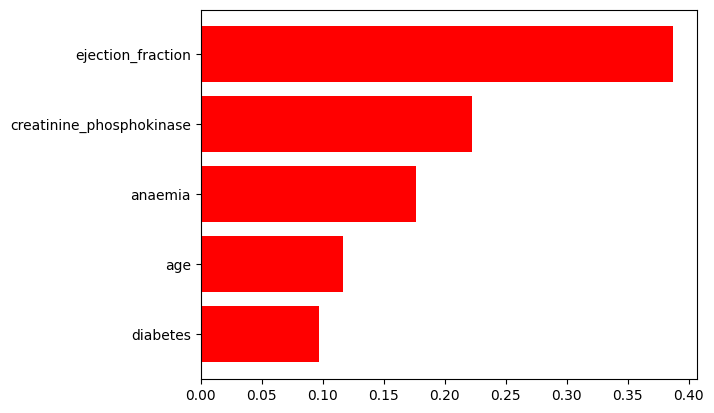

In [126]:
rf = RandomForestClassifier(n_estimators=300, random_state=42,max_depth=None,min_samples_leaf=1,min_samples_split=2)

rf.fit(X_train,y_train)
features = df.drop(['DEATH_EVENT', 'time'],axis=1)
rf_result = list(zip(features, rf.feature_importances_))
rf_result.sort(key = lambda x : x[1])
plt.barh([x[0] for x in rf_result],[x[1] for x in rf_result], color="r", align="center")

plt.show()

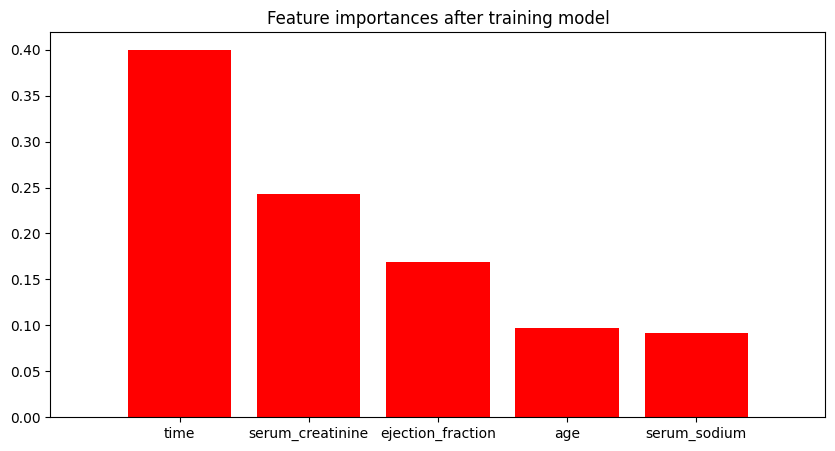

In [124]:
import matplotlib.pyplot as plt
importances = best_estimators["RandomForest"].named_steps["clf"].feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,5))
plt.title("Feature importances after training model")
plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(X.shape[1]), filtered_corr_with_target.keys()[indices])
plt.xlim([-1, X.shape[1]])
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score

# Dictionary untuk menyimpan cross-validation scores
cv_scores = {}

# Loop melalui model-model yang tersisa
for clf_name, clf_pipeline in best_estimators.items():
    # Mendapatkan model dari pipeline
    clf = clf_pipeline.named_steps["clf"]

    # Melakukan cross-validation
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')

    # Menyimpan cross-validation scores
    cv_scores[clf_name] = scores

    # Menampilkan hasil cross-validation scores
    print(f"Cross-validation scores for {clf_name}: {scores}")
    print(f"Mean cross-validation score for {clf_name}: {scores.mean():.4f}")


Cross-validation scores for RandomForest: [0.80357143 0.91071429 0.875      0.87272727 0.8       ]
Mean cross-validation score for RandomForest: 0.8524
Cross-validation scores for Logistic: [0.83928571 0.83928571 0.80357143 0.81818182 0.78181818]
Mean cross-validation score for Logistic: 0.8164
Cross-validation scores for KNeighbors: [0.82142857 0.875      0.78571429 0.83636364 0.76363636]
Mean cross-validation score for KNeighbors: 0.8164
Cross-validation scores for DecisionTree: [0.80357143 0.78571429 0.76785714 0.81818182 0.8       ]
Mean cross-validation score for DecisionTree: 0.7951


E:\SUNIB\Semester $\Lec\Speech\Projects\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
E:\SUNIB\Semester $\Lec\Speech\Projects\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
E:\SUNIB\Semester $\Lec\Speech\Projects\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
E:\SUNIB\Semester $\Lec\Speech\Projects\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
E:\SUNIB\Semester $\Lec\Speech\Projects\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:1197: UserWarning: l1_ratio parameter is only used when

Cross-validation scores for MLPClassifier: [0.82142857 0.80357143 0.85714286 0.87272727 0.81818182]
Mean cross-validation score for MLPClassifier: 0.8346
Cross-validation scores for SVC: [0.76785714 0.80357143 0.80357143 0.70909091 0.69090909]
Mean cross-validation score for SVC: 0.7550


<Axes: >

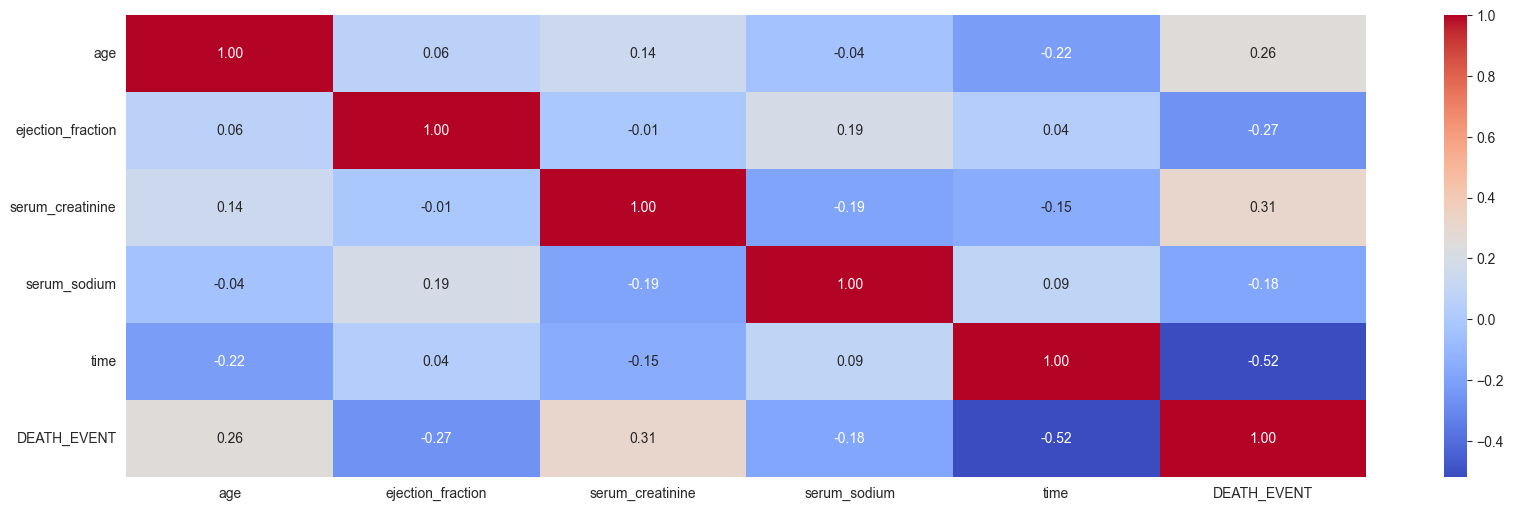

In [ ]:
plt.figure(figsize=(20,6))
sns.heatmap(scaled_df_mod.corr(), annot=True, fmt='.2f', cmap='coolwarm')

In [ ]:
Xs = scaled_df.drop(["DEATH_EVENT"], axis=1)
ys = scaled_df['DEATH_EVENT']

X_resamples, y_resamples = ADASYN(random_state=42).fit_resample(Xs, ys)
X_trains, X_tests, y_trains, y_tests = train_test_split(X_resamples,y_resamples,test_size = 0.2, random_state=42)

In [127]:
from sklearn.cross_decomposition import PLSRegression
import numpy as np

# Inisialisasi model PLS dengan jumlah komponen yang diinginkan
pls = PLSRegression(n_components=2)

# Latih model PLS pada data latih
pls.fit(X_train, y_train)

# Hitung skor VIP
vip_scores = np.sum(np.square(pls.x_weights_), axis=1) * np.sum(np.square(pls.y_loadings_), axis=1)
idx = np.argsort(vip_scores)
# Tampilkan skor VIP untuk setiap variabel
for i in idx:
    print(f"Variable {filtered_corr_with_target.keys()[i]}: VIP score = {vip_scores[i]:.4f}")


Variable serum_sodium: VIP score = 0.0872
Variable serum_creatinine: VIP score = 0.0933
Variable age: VIP score = 0.1061
Variable ejection_fraction: VIP score = 0.1246
Variable time: VIP score = 0.1855


In [ ]:
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)